 ## Test assignment

1. Open the file test.fits in Python.  
2. Crop a 40x40 pixel region around the brightest star in the image.  
3. Save the cropped region as test2.fits.
4. Use the code *photutils* to measure the centroid of this star in the uncropped region

If you can’t do this problem, or would just like some more practice, 
we’ve compiled some tutorials below.

To submit your assignment, do:

1. Create a branch on this Repo (you should not fork it;  you have write access)
2. Add a folder named after you (e.g. *profx*) under student_work/
3. Add your code/notebook in there


In [31]:
from astropy.io import fits

In [32]:
fits_img = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_img)
test = fits.open('test.fits')

In [33]:
hdul.info()

Filename: /Users/astroadmin/opt/anaconda3/lib/python3.9/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [34]:
test.info()

Filename: test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     269   (256, 256)   float32   


In [35]:
test_data = test[0].data # assume 256x256 image or 2D numpy array
#print(test_data[0,:])
type(test_data)# 2d array confirmed

numpy.ndarray

## Method 2: By Eye - Manually plotting with matplot lib 
This is the method I used because I could not figure out how to get ds9 to work on my computer. Since the data type is a 2D array and knowing the exact dimensions, it can be ploted as a 2d - histogram. So I found a tutorial and followed a similar rubric. 

However, I still think Ds9 would have been better to use. Below is the solution to the test assignment and below that is information I used in my attempt to get ds9 working, so ignore. 

#### 2.1 Open Fits and view field

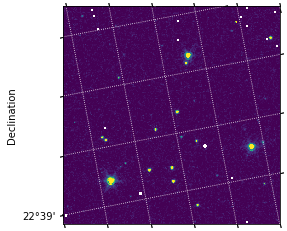

In [53]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
 
# Open the FITS file and retrieve the data
# and WCS header keyword information from the
# first science extension. Save the WCS
# information into an Astropy WCS object.
with fits.open('test.fits') as hdu:
    data = hdu[0].data
    wcs = WCS(hdu[0].header)
 
# Select a subsection of the image to display.
# Here we have selected a 400 x 400 pixel section
# with x = [280:680] and y = [2290:2690].
cutout = data[0:256, 0:256]
cutout40 = data[0:100, 0:100]
# Create the plotting object with the WCS projection.
plt.subplot(projection=wcs)
plt.imshow(cutout, vmin=0, vmax=100)
plt.grid(color='white', ls=':', alpha=1)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
 
# Save the figure.
plt.savefig('test_original.png')

#### 2.2 Identify region to crop as save as test2.fits

OSError: File test2.fits already exists. If you mean to replace it then use the argument "overwrite=True".

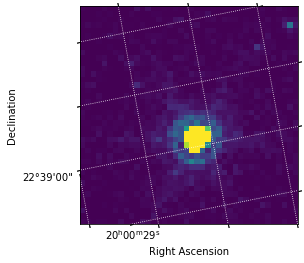

In [103]:
cutout40 = data[35:75, 35:75]
# Create the plotting object with the WCS projection.
plt.subplot(projection=wcs)
plt.imshow(cutout40, vmin=0, vmax=300)
plt.grid(color='white', ls=':', alpha=1)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
 
# Save the figure.
plt.savefig('test_cutout.png')

# Save Fits
# cutout40.writeto('test2.fits')
with fits.open('test.fits') as f:
#     data = hdu[0].data
    w = WCS(f[0].header)
    newf = fits.PrimaryHDU()
    newf.data = f[0].data[35:75, 35:75]
    newf.header = f[0].header
    newf.writeto('test2.fits', overwrite)

#### 2.3 : Running photoutils : Still working on this. would have been easier with ds9. 
I tried following a tutorial but im still not done with the part on centering on the brightest star. What you see below is unfinished. 

In [100]:
from astropy.stats import sigma_clipped_stats
from photutils.datasets import load_star_image
with fits.open('test.fits') as hdu:
    data = hdu[0].data
#     data = newf.data
    wcs = WCS(hdu[0].header)
# hdu = load_star_image()  
# data = hdu.data[0:401, 0:401]  
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  
print((mean, median, std))  
(3668.09661145823, 3649.0, 204.41388592022315)

(0.17046742, 0.17960346, 4.8819885)


(3668.09661145823, 3649.0, 204.41388592022315)

In [101]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=5.0, threshold=10.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid sharpness  ... sky    peak      flux      mag    
--- --------- --------- ---------- ... --- --------- --------- ----------
  1 157.52225 21.726235 0.98291431 ...   0 223.71484 5.1726298 -1.7842785


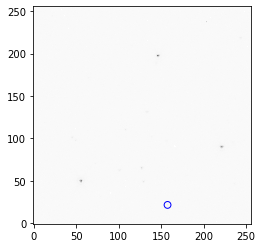

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm,
           interpolation='nearest')
apertures.plot(color='blue', lw=1, alpha=1)

### Method 1 : Using DS9 (Failed)

 To view image I will use ds9 from SAOImage ds9. 
 
 Link to walk through tutorial --> https://www.astrobetter.com/blog/2010/07/14/manipulating-and-viewing-fits-files-in-python-with-pyds9/ 
 
 Link to download --> https://sites.google.com/cfa.harvard.edu/saoimageds9
 
 Link to pyds9 info --> https://github.com/ericmandel/pyds9
 
 To get it to work for MacOS first install xcode : available on app store. FYI download takes a while. 
 
 Used GlueViz while I waited. Confirmed image would appear. 
 
 Uploaded image to astrometry to locate star field. Link to results --> https://nova.astrometry.net/user_images/6471639#annotated
Center (RA, Dec):	(300.158, 22.699)
Painfully slow download so checked out this legacy survey. Really cool to zoom out and view sky survey maps wrt this specific region. Link --> https://www.legacysurvey.org/viewer/?ra=300.1582&dec=22.6995&layer=unwise-neo6&poly=300.1213,22.6492,300.1038,22.7336,300.1952,22.7497,300.2127,22.6653,300.1213,22.6492


installed mac Ports

In [38]:
from scipy import stats
import numpy as np
import ds9 #

ModuleNotFoundError: No module named 'pyraf'

#### How to measure the brightness of a star: 

This depends on the filters used to observe. UVB photometry compare ratios of brightness of visible light (540nm) to blue light (442nm) and light in the UV 364nm. 